## Load librairies 

In [40]:
#Librairie de traiement de données
import pandas as pd
import numpy as np

#Librairies pour extraction de données (Regex,Stopwords,Lemmatisation)
import re
from spacy.lang.en.stop_words import STOP_WORDS as en_stop #Spacy stopwords
from nltk.stem import WordNetLemmatizer
import nltk

#Librairies pour la visualisation de données 
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

#Ignore les warning en cas de problème de traiement
import warnings
warnings.filterwarnings("ignore")

In [41]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Load dataset

Face aux nombreuses avancées dans le domaine de l'intelligence artificielle, ChatGPT se distingue par sa polyvalence et son utilité dans divers secteurs. Qu'il s'agisse de produire des contenus personnalisés tels que des e-mails, des poèmes ou des extraits de code, ou encore de transformer les processus de travail dans les entreprises et les outils éducatifs, son impact est indéniable.

En nous intéressant à un sujet d'actualité majeur en 2023, nous avons choisi de focaliser notre attention sur ChatGPT à travers l'analyse de Twitter. Ce projet vise à étudier environ 300 000 tweets relatifs à cet outil révolutionnaire et à développer une application Streamlit. L'objectif est d'explorer la curiosité et l'engouement des utilisateurs pour ChatGPT, tout en mettant en lumière les facteurs clés qui influencent son évolution future.

Ce jeu de données offre une opportunité unique de comprendre l'opinion publique, les tendances émergentes et les applications potentielles de ChatGPT. En examinant des aspects tels que le volume de tweets, le sentiment, l'engagement des utilisateurs et l'influence des événements clés autour de l'IA, il fournit des insights précieux. Ces analyses peuvent guider les entreprises, les chercheurs et les décideurs dans leurs choix stratégiques et contribuer à orienter le développement des technologies conversationnelles basées sur l'IA.

*https://huggingface.co/datasets/deberain/ChatGPT-Tweets Dataset utilisé pour les tweets*

Articles de presse qui sont utilisés à l'origine de la source de données:   

*https://medium.com/@ka2612/effortlessly-scraping-massive-twitter-data-with-snscrape-a-guide-to-scraping-1000-000-tweets-in-d01c38e82d18 Effortlessly Scraping Massive Twitter Data with snscrape: A Guide to Scraping 1000,000 Tweets in Less than a Day*

*https://medium.com/@ka2612/the-chatgpt-phenomenon-unraveling-insights-from-500-000-tweets-using-nlp-8ec0ad8ffd37  Cracking the ChatGPT Code: A Deep Dive into 500,000 Tweets using Advanced NLP Techniques*

In [42]:
# On souhaitera d'importer notre jeu de données 

#Décommenter si vous voulez récupérer le jeu de données sur le site de Hugging Face avec Pandas et de convertir en fichier CSV
#download = pd.read_parquet("hf://datasets/deberain/ChatGPT-Tweets/data/train-00000-of-00001-c77acc9ef8da1d50.parquet")
#download.to_csv('data/tweets_users_chatgpt.csv',index=False)

In [43]:
#Lecture sur fichier CSV
df = pd.read_csv('data/tweets_users_chatgpt.csv')

### Analyse descriptive du Dataset

In [44]:
df.head()

,Date,Tweet,Url,User,UserCreated,UserVerified,UserFollowers,UserFriends,Retweets,Likes,Location,UserDescription
0,2023-02-24 07:59:26+00:00,How to hire 100x more productive team members ...,https://twitter.com/smnishad/status/1629028212...,smnishad,2009-03-04 15:50:52+00:00,False,2524.0,4966.0,0.0,0.0,"New Delhi, India",Account Planning at Adfactors Advertising
1,2023-02-24 07:59:23+00:00,Chatgtp breakfast about to start #ChatGPT #fut...,https://twitter.com/SevenKingsSch/status/16290...,SevenKingsSch,2010-05-06 09:05:00+00:00,False,1322.0,174.0,0.0,0.0,"Ilford, Redbridge",All Through. Outstanding. World Class. See Six...
2,2023-02-24 07:59:17+00:00,@PiCoreTeam Pi network will be one of the supe...,https://twitter.com/jad_alrabe3/status/1629028...,jad_alrabe3,2012-03-05 03:41:41+00:00,False,311.0,1822.0,0.0,0.0,"Irbid, jordan",أنا وقلبي وعَقلٌ لم يَسَع حُلُمي\nيا ربُّ هيِّ...
3,2023-02-24 07:58:54+00:00,Build your first $100K/Year Start-up in just 2...,https://twitter.com/yournotionguy/status/16290...,yournotionguy,2023-02-09 13:22:56+00:00,False,43.0,10.0,0.0,0.0,NaN,🤓 Productivity nerd\n🗒️ Daily Notion tips & tr...
4,2023-02-24 07:58:45+00:00,Disappointed with @Samsung. My TV stopped work...,https://twitter.com/sbmza/status/1629028042340...,sbmza,2009-11-28 06:45:15+00:00,False,175.0,1644.0,0.0,0.0,NaN,Vires in Numeris


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305432 entries, 0 to 305431
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             305426 non-null  object 
 1   Tweet            305426 non-null  object 
 2   Url              305401 non-null  object 
 3   User             305401 non-null  object 
 4   UserCreated      305401 non-null  object 
 5   UserVerified     305401 non-null  object 
 6   UserFollowers    305401 non-null  float64
 7   UserFriends      305401 non-null  float64
 8   Retweets         305401 non-null  object 
 9   Likes            305401 non-null  object 
 10  Location         229012 non-null  object 
 11  UserDescription  290655 non-null  object 
dtypes: float64(2), object(10)
memory usage: 28.0+ MB


#### Dimensions de la DataFrame

In [46]:
print("Length: ",len(df))
print("Shape: ",df.shape)

Length:  305432
Shape:  (305432, 12)


#### Description statistique de likes et de retweets

In [47]:
# Getting descriptive statistics on likes and retweets:
print(df[['Likes', 'Retweets']].describe())

           Likes  Retweets
count   305401.0  305401.0
unique    1076.0     500.0
top          0.0       0.0
freq     88795.0  145501.0


#### Liste des valeurs uniques pour chaque colonne

In [48]:
for col in df.columns:
    print(col, ":", df[col].nunique())

Date : 294817
Tweet : 303269
Url : 305401
User : 144306
UserCreated : 144272
UserVerified : 6
UserFollowers : 17993
UserFriends : 8166
Retweets : 500
Likes : 1076
Location : 33739
UserDescription : 133514


##### Nombre de mots utilisés en moyenne pour un tweet

In [49]:
# Average tweet length in words
count = 0
for i in df['Tweet']:
    count += len(''.join(str(i).split()))
avg_tweet_length = count / len(df['Tweet'])
print("Average Tweet length is:", avg_tweet_length)

Average Tweet length is: 145.79199625448544


### Data Preprocessing du Dataset

##### Enlever  les valeurs manquantes et extraire les données

In [50]:
#Vérification des valeurs manquantes sur notre dataset
print(df.isnull().sum())

Date                   6
Tweet                  6
Url                   31
User                  31
UserCreated           31
UserVerified          31
UserFollowers         31
UserFriends           31
Retweets              31
Likes                 31
Location           76420
UserDescription    14777
dtype: int64


In [51]:
print("Avant la suppression des données manquantes: ",len(df))
df = df.dropna()
print("Après la suppression des données manquantes: ",len(df))

Avant la suppression des données manquantes:  305432
Après la suppression des données manquantes:  223775


#### Convertir les dates en objet pour la date du tweet et la création du user

In [52]:
# Convertir la date en objet de date
df['Date'] = pd.to_datetime(df['Date'])

# Extraire le composant date uniquement et affectez-le à la colonne « date »
df['Date'] = df['Date'].dt.date

# Vérification la portée des dates
print("Date départ pour la création des tweets: " ,df['Date'].min())
print("Date de fin pour la création des tweets: " ,df['Date'].max())

Date départ pour la création des tweets:  2022-11-30
Date de fin pour la création des tweets:  2023-02-24


In [53]:
# Convertir la date en objet de date
df['UserCreated'] = pd.to_datetime(df['UserCreated'])

# Extraire le composant date uniquement et affectez-le à la colonne « date »
df['UserCreated'] = df['UserCreated'].dt.date

# Vérification la portée des dates
print("Date départ pour la création des utilisateurs: " ,df['UserCreated'].min())
print("Date de fin pour la création des utilisateurs:" ,df['UserCreated'].max())

Date départ pour la création des utilisateurs:  2006-05-23
Date de fin pour la création des utilisateurs: 2023-02-24


In [54]:
for col in df.columns:
    print(col, ":", df[col].nunique())

Date : 87
Tweet : 222162
Url : 223775
User : 104806
UserCreated : 5962
UserVerified : 4
UserFollowers : 16450
UserFriends : 7907
Retweets : 446
Likes : 971
Location : 32990
UserDescription : 104323


#### Extraction des tweets pour récupérer les hashtages et les mentions d'utilisateurs

In [55]:
# Fonction pour extraire les hashtags
def extract_hashtags(text):
    text = text.lower()
    text = re.findall(r"#\w+", text)
    return text

# Fonction pour extraire les mentions d’utilisateurs
def extract_mentions(text):
    text = text.lower()
    text = re.findall(r"@\w+", text)
    return text

# Extraction des hashtags et des mentions
df['hashtags'] = df['Tweet'].apply(lambda x: extract_hashtags(x))
df['mentions'] = df['Tweet'].apply(lambda x: extract_mentions(x))

## Text Processing 

In [56]:
def remove_emoji():
  regex_pattern = re.compile(pattern = "["    #Pattern pour enlever les emojis
          u"\U0001F600-\U0001F64F"  # emoticons
          u"\U0001F300-\U0001F5FF"  # symbols & pictographs
          u"\U0001F680-\U0001F6FF"  # transport & map symbols
          u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
          u"\U00002702-\U000027B0"
          u"\U00002702-\U000027B0"
          u"\U000024C2-\U0001F251"
          u"\U0001f926-\U0001f937"
          u"\U00010000-\U0010ffff"
          u"\u2640-\u2642" 
          u"\u2600-\u2B55"
          u"\u200d"
          u"\u23cf"
          u"\u23e9"
          u"\u231a"
          u"\ufe0f"  # dingbats
          u"\u3030"
                            "]+", flags = re.UNICODE)
  return regex_pattern

def lematize(text):
  lemmatizer = WordNetLemmatizer()
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
  stopwords = " ".join([word for word in str(text).split() if word not in en_stop]) #Spacy stopwords
  return stopwords

def remove_words(text):
  liste_terme = ["i","x","wa", "a", "ha","ve","it", "t", "u", "n", "s", "d", "l", "j", "y", "c", "e", "m", "h", "t", "cht", "lr", "oas", "qu", "ll", "yu", "an", "g", "don t", "we", "you", "me", "the"]
  return " ".join([word for word in str(text).split() if word not in liste_terme])

def final_preprocess(text): 
    text = text.lower()  #Mettre tout les mots en minuscule 
    text = re.sub(r'{link}', '',text) #Remove links 
    text = re.sub(r"\[video\]", '',text) #Remove videos
    text = re.sub(r'&[a-z]+;', '',text) #Remove HTML references

    text = re.sub(r'@\w+', '', text) #Remove mention
    text = re.sub(r'#\w+', '', text) #Remove hashtag

    text = re.sub(r'\d+', '', text) #Remove numbers 
    text = re.sub(r'http\S+', '',text) #Remove HTML
    text = re.sub(r'www\S+', '',text) #Remove HTML
    text = re.sub(r'[^\w\s]+',' ',text) #Remove ponctuation et apostrophes
    text = re.sub(r'\s+',' ', text) #Remove new line characters

    text = re.sub(remove_emoji(),'',text)  #Remove les emojis
    text = lematize(text) #Lemmatization
    text = remove_words(text) #Remove custom words 
    text = remove_stopwords(text) #Remove stopwords
    return text 

In [57]:
df['processed_tweet'] = df['Tweet'].apply(lambda x: final_preprocess(x))
df['processed_userdescription'] = df['UserDescription'].apply(lambda x: final_preprocess(x))

Affichage du résultat après le preprocessing

In [58]:
df["processed_tweet"].head()

0    hire productive team member free interviewed h...
1                              chatgtp breakfast start
2                    pi network super portal web world
5         future writing world artificial intelligence
6                       edtech world forum london book
Name: processed_tweet, dtype: object

In [59]:
df["processed_userdescription"].head()

0               account planning adfactors advertising
1    outstanding world class sixthform seven king l...
2    أنا وقلبي وع قل لم ي س ع ح ل مي يا رب هي ئ لنا...
5                                       change enabler
6      metaverse world london uk leading metaverse hub
Name: processed_userdescription, dtype: object

Nombre de tweets uniques après le text preprocessing dans les colonnes processed tweet et processed userdescription 

In [60]:
print('Colonne Tweet', ":", df['Tweet'].nunique())
print('Colonne UserDescription', ":", df['UserDescription'].nunique())

print('Colonne processed_tweet', ":", df['processed_tweet'].nunique())
print('Colonne processed_userdescription', ":", df['processed_userdescription'].nunique())

Colonne Tweet : 222162
Colonne UserDescription : 104323
Colonne processed_tweet : 200867
Colonne processed_userdescription : 100715


On conserve les lignes de contenu avec le plus grand engagement

In [61]:
# Conversion 'Likes' en valeur numérique
df['Likes'] = pd.to_numeric(df['Likes'])

# Tri du DataFrame par la colonne 'Likes' (du plus grand au plus petit)
df = df.sort_values(by='Likes', ascending=False)

# Suppression des doublons basés sur la colonne 'processed_tweet'
df = df.drop_duplicates(subset='processed_tweet').sort_index()

In [62]:
df.to_csv("data/tweets_preprocess.csv",index=False)

In [63]:
# Fusionner tous les textes en une seule chaîne
all_words = ' '.join(df['processed_tweet']).split()

# Compter les occurrences des mots et les afficher
word_counts = pd.DataFrame(all_words).value_counts().reset_index()
word_counts.columns = ['Word', 'Count']

In [64]:
word_counts.to_csv("data/word_counts.csv")

In [65]:
word_counts.head()

,Word,Count
0,ai,41694
1,chatgpt,41606
2,like,16708
3,use,13581
4,new,13203


### Tests de Visualisations

Sur Streamlit, plus tard on va définir trois types de filtrage: <br>
- Le filtrage par menu déroulant (jour, semaine et mois) et deux menus déroulant  le départ et la fin de la date  <br>
- Le filtrage pour définir les seuils maximum pour le nombre de likes et de retweets (Utilisation du filtrage sur Streamlit)<br>
- Le filtrage pour définir combien d'occurrences de mots contenant sur l'ensemble des tweets

#### Nuage de points entre le nombre de likes et de retweets
##### Analyse des interactions sociales 

In [66]:
max_like_count = 1500
max_retweet_count = 300
min_like_count = 150
min_retweet_count = 50

#Convertir le format numérique pour les trois colonnes
df['Likes'] = pd.to_numeric(df['Likes'])
df['Retweets'] = pd.to_numeric(df['Retweets'])

# Filtrez le DataFrame pour inclure uniquement les lignes où like_count et retweet_count sont inférieurs aux seuils
df_filtered = df[
    (df['Likes'] <= max_like_count) & 
    (df['Likes'] >= min_like_count) & 
    (df['Retweets'] <= max_retweet_count) & 
    (df['Retweets'] >= min_retweet_count)
]

Le contenu informatif a plus de chances d'être retweeté pour sensibiliser les gens, tandis que le contenu divertissant est souvent préféré pour ses aspects agréables, ce qui lui vaut davantage de likes. <br> Préférences des utilisateurs : certains peuvent aimer un tweet s'il correspond à leurs valeurs, tandis que d'autres préfèrent le retweeter pour le partager avec leurs abonnés. <br> Contexte du tweet : les tweets sur des sujets d'actualité ont plus de chances de recevoir des retweets, car ils enrichissent la discussion, alors que ceux à caractère personnel ou émotionnel récoltent souvent plus de likes, en signe de soutien ou d'empathie. <br>

In [67]:
fig = px.scatter(
    df_filtered,
    x='Likes',
    y='Retweets',
    color='Likes',  # Remplacez par une colonne pertinente si disponible
    hover_data=['User'],  # Inclure le nom d'utilisateur dans les infobulles
    color_continuous_scale=[ (0,  "#ff7f00"),  # Couleur pour les faibles densités
        (0.5, "#e5e619"),                   
        (1, "#16bb26")]  # Couleur pour les densités élevées]  # Palette de couleurs pour un rendu esthétique
)
# Personnalisation de la mise en page
fig.update_layout(
    title={
        'text': "Relation entre Likes et Retweets",
        'y': 0.95, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'
    },
    xaxis=dict(
        title='Nombre de Likes',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
        zeroline=True, zerolinecolor='black'
    ),
    yaxis=dict(
        title='Nombre de Retweets',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
        zeroline=True, zerolinecolor='black'
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Rendre le fond transparent
    height=600, width=800
)

#### Periode d'analyse de données en jour, semaine et mois

In [68]:

# Compter la fréquence des tweets par date
date_distribution = df["Date"].value_counts().reset_index()
date_distribution.columns = ["Date", "TweetCount"]
date_distribution = date_distribution.sort_values("Date")  # Trier par date

In [69]:
# Créer un graphique à barres
fig = px.bar(
    date_distribution,
    x="Date",
    y="TweetCount",
    color='TweetCount',  # Remplacez par une colonne pertinente si disponible
    title="Distribution des tweets par période",
    color_continuous_scale=[ (0, "#ADD8E6"),  # Couleur pour les faibles densités
        (0.5,"#0047AB" ),  # Couleur pour les densités moyennes
        (1, "#FFD700")]
)

# Personnalisation du graphique
fig.update_traces(textposition="outside")
fig.update_layout(
    width=800,
    height=500,
    coloraxis_colorbar=dict(
        title="Quantité de Tweets",  # Titre de la barre de couleur
        ticks="outside",
    ),
    xaxis=dict(
        title='Date de publication',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
    ),
    yaxis=dict(
        title='Nombre de tweets',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
    ),
    plot_bgcolor='rgba(0,0,0,0)',  # Rendre le fond transparent
)

# Afficher le graphique
fig.show()

#### "Les 20 utilisateurs les plus actifs sur Twitter concernant le sujet de ChatGPT.

In [70]:
tweets_by_user = df.groupby('User').size().sort_values(ascending=False)

In [71]:

# Créer le graphique avec une échelle de couleurs basée sur le nombre de tweets
fig_users = px.bar(
    y=tweets_by_user.index[:20][::-1],  # Inverser pour avoir l'ordre décroissant de haut en bas
    x=tweets_by_user[:20][::-1],       # Correspondance des valeurs
    title='Top 20 des utilisateurs actifs entre novembre 2022 à février 2023',
    orientation='h',
    color=tweets_by_user[:20][::-1],   # Utiliser le nombre de tweets pour la couleur
    color_continuous_scale=[(0, "#ADD8E6"), (1, "#0047AB")] # Choisir une échelle de couleur (exemple : 'Viridis', 'Plasma', 'Cividis', etc.)
)

# Ajuster les options de la mise en page
fig_users.update_layout(
    width=800,
    height=500,
    coloraxis_colorbar=dict(
        title="Quantité de Tweets",  # Titre de la barre de couleur
        ticks="outside",
    ),
     xaxis=dict(
        title='Total de Tweets',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
    ),
    yaxis=dict(
        title='Nom des utilisateurs',
        showgrid=True, gridcolor='lightgrey', gridwidth=0.5,
    ),
)

fig_users.show()

#### Représentation d'un Wordcloud en fonction d'occurrence de mots des tweets 

In [72]:
from random import choice

# Define a custom color function
def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ['#1DA1F2', '#00CC96', '#FF5733', '#FFC300', '#E91E63', '#9C27B0', '#673AB7']
    return choice(colors)

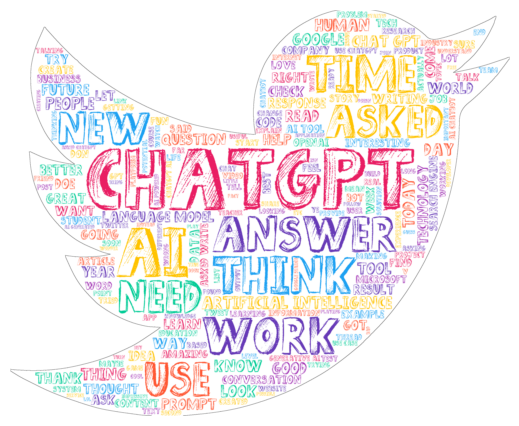

In [73]:
from PIL import Image

logo_image = Image.open("data/twitter-logo.png")
logo_array = np.array(logo_image)

wordcloud_twitter = WordCloud(height=500, width=500,
                              background_color="white", mode="RGB",
                              mask=logo_array, color_func=custom_color_func,
                              contour_width=0.5, contour_color='black',
                              font_path='content/SketchBook-B5pB.ttf').generate(' '.join(all_words)) 


plt.figure(figsize=[5, 5])
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wordcloud_twitter, interpolation="bilinear")
plt.savefig("data/twitter_wordcloud.png", format="png")
plt.show()

#### Analyse des hashtags et des mentions d’utilisateurs

- Heatmap
- Diagramme circulaire
- Graphes en réseau
- Diagrammes en colonnes empilées 

In [74]:
# Initialiser des listes vides pour les hashtags et mentions
hashtags_flat = []
mentions_flat = []
top_number_hashtags = 10 
top_number_mentions = 10 

# Remplir les listes avec une boucle explicite
for hashtags_list in df['hashtags']:
    hashtags_flat.extend(hashtags_list)

for mentions_list in df['mentions']:
    mentions_flat.extend(mentions_list)

# Créer les DataFrames pour les top 10 hashtags et mentions
top_hashtags = pd.Series(hashtags_flat).value_counts().reset_index()
top_hashtags.columns = ['Hashtag', 'Count']

top_mentions = pd.Series(mentions_flat).value_counts().reset_index()
top_mentions.columns = ['Mention', 'Count']

In [75]:
top_mentions.to_csv("data/top_mentions.csv")
top_hashtags.to_csv("data/top_hashtags.csv")

In [76]:
# Afficher les résultats
print("Top 10 Hashtags:")
print(top_hashtags)

print("\nTop 10 Mentions:")
print(top_mentions)

Top 10 Hashtags:
                       Hashtag   Count
0                     #chatgpt  203776
1                          #ai   47167
2                      #openai   17830
3      #artificialintelligence   10825
4                      #google    5699
...                        ...     ...
51654                 #blitz3d       1
51655              #blitzbasic       1
51656         #parallelcluster       1
51657           #lookaroundyou       1
51658                   #nixon       1

[51659 rows x 2 columns]

Top 10 Mentions:
                Mention  Count
0               @openai  10540
1             @elonmusk   2997
2               @google   1638
3            @microsoft   1480
4                 @sama   1248
...                 ...    ...
35359  @rhondawilsonmhn      1
35360     @lajohnstondr      1
35361        @dreddpitt      1
35362    @celia_popovic      1
35363            @going      1

[35364 rows x 2 columns]


In [77]:
# Diagramme circulaire interactif pour les hashtags
fig_hashtags = px.pie(top_hashtags.head(top_number_hashtags), 
                      width=600,
                      height=500,
                      values='Count', 
                      names='Hashtag', 
                      title='Top 10 Hashtags',
                      color_discrete_sequence=px.colors.sequential.RdBu)
fig_hashtags.show()


In [78]:
# Diagramme circulaire interactif pour les mentions d’utilisateurs
fig_mentions = px.pie(top_mentions.head(top_number_mentions), 
                      width=600,
                      height=500,
                      values='Count', 
                      names='Mention', 
                      title='Top 10 Mentions',
                      color_discrete_sequence=px.colors.sequential.Blues_r)
fig_mentions.show()